### GOAL

Create a regression model to predict the amount of points an NBA player averages based on there other game statistics.

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/drive/MyDrive/capstone_II/all_players - Sheet1.csv')
test= df

test

,player_name,age,player_height,player_weight,draft_year,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,A.C. Green,33,205.74,102.05820,1985,83,7.2,7.9,0.8,-8.0,0.100,0.207,0.119,0.523,0.045,1996-97
1,A.C. Green,34,205.74,102.05820,1985,82,7.3,8.1,1.5,-7.2,0.090,0.196,0.118,0.496,0.074,1997-98
2,A.C. Green,35,205.74,102.05820,1985,50,4.9,4.6,0.5,-5.6,0.097,0.179,0.148,0.441,0.043,1998-99
3,A.C. Green,36,205.74,102.05820,1985,82,5.0,5.9,1.0,8.1,0.089,0.179,0.111,0.482,0.058,1999-00
4,A.C. Green,37,205.74,102.05820,1985,82,4.5,3.8,0.5,3.3,0.089,0.171,0.141,0.492,0.050,2000-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12839,Zydrunas Ilgauskas,34,220.98,117.93392,1996,65,12.9,7.5,1.0,14.8,0.109,0.212,0.237,0.523,0.060,2008-09
12840,Zydrunas Ilgauskas,35,220.98,117.93392,1996,64,7.4,5.4,0.8,7.9,0.107,0.197,0.189,0.491,0.058,2009-10
12841,Zydrunas Ilgauskas,36,220.98,117.93392,1996,72,5.0,4.0,0.4,9.4,0.119,0.178,0.159,0.531,0.033,2010-11
12842,Zylan Cheatham,24,195.58,99.79024,Undrafted,4,3.0,2.3,0.8,-23.9,0.062,0.128,0.103,0.667,0.094,2019-20


We need have the NBA players dataset. First, we want to change the **player name** column to a numeric vakue/indicator to make the computational work ahead easier for us.

In [ ]:
q=1
for i in range(0,len(df['player_name'])-1):
  if test.loc[i, 'player_name']==test.loc[i+1, 'player_name']:
    test.loc[i,'player_name']= q
  else:
    test.loc[i,'player_name']= q
    q+=1

test.loc[len(df['player_name'])-1,'player_name']= test.loc[len(df['player_name'])-2,'player_name']

test

,player_name,age,player_height,player_weight,draft_year,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,1,33,205.74,102.05820,1985,83,7.2,7.9,0.8,-8.0,0.100,0.207,0.119,0.523,0.045,1996-97
1,1,34,205.74,102.05820,1985,82,7.3,8.1,1.5,-7.2,0.090,0.196,0.118,0.496,0.074,1997-98
2,1,35,205.74,102.05820,1985,50,4.9,4.6,0.5,-5.6,0.097,0.179,0.148,0.441,0.043,1998-99
3,1,36,205.74,102.05820,1985,82,5.0,5.9,1.0,8.1,0.089,0.179,0.111,0.482,0.058,1999-00
4,1,37,205.74,102.05820,1985,82,4.5,3.8,0.5,3.3,0.089,0.171,0.141,0.492,0.050,2000-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12839,2550,34,220.98,117.93392,1996,65,12.9,7.5,1.0,14.8,0.109,0.212,0.237,0.523,0.060,2008-09
12840,2550,35,220.98,117.93392,1996,64,7.4,5.4,0.8,7.9,0.107,0.197,0.189,0.491,0.058,2009-10
12841,2550,36,220.98,117.93392,1996,72,5.0,4.0,0.4,9.4,0.119,0.178,0.159,0.531,0.033,2010-11
12842,2551,24,195.58,99.79024,Undrafted,4,3.0,2.3,0.8,-23.9,0.062,0.128,0.103,0.667,0.094,2019-20


Drop the columns we do not need for the model.  Then we will have all numeric features.


In [ ]:
test= test.drop(columns=['season','draft_year'])
test['player_name'] = pd.to_numeric(test['player_name'])
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12844 entries, 0 to 12843
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   player_name    12844 non-null  int64  
 1   age            12844 non-null  int64  
 2   player_height  12844 non-null  float64
 3   player_weight  12844 non-null  float64
 4   gp             12844 non-null  int64  
 5   pts            12844 non-null  float64
 6   reb            12844 non-null  float64
 7   ast            12844 non-null  float64
 8   net_rating     12844 non-null  float64
 9   oreb_pct       12844 non-null  float64
 10  dreb_pct       12844 non-null  float64
 11  usg_pct        12844 non-null  float64
 12  ts_pct         12844 non-null  float64
 13  ast_pct        12844 non-null  float64
dtypes: float64(11), int64(3)
memory usage: 1.4 MB


In [ ]:
try_array=test.to_numpy()
len(try_array)

12844

We are going to take the 2 year average of the player statistics to try to filter any outliers or special cases (injury, suspension, etc.).


In [ ]:

array = []
for i in range(len(try_array)):

  if i==0:
    transfer = try_array[i]
    array.append(transfer)

  elif try_array[i][0]!=try_array[i-1][0]:
    transfer = try_array[i]
    array.append(transfer)

  else:
    transfer = (try_array[i]+try_array[i-1])/2
    array.append(transfer)

holder = pd.DataFrame(array)
df= df.drop(columns=['season','draft_year'])
df

,player_name,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
0,1,33,205.74,102.05820,83,7.2,7.9,0.8,-8.0,0.100,0.207,0.119,0.523,0.045
1,1,34,205.74,102.05820,82,7.3,8.1,1.5,-7.2,0.090,0.196,0.118,0.496,0.074
2,1,35,205.74,102.05820,50,4.9,4.6,0.5,-5.6,0.097,0.179,0.148,0.441,0.043
3,1,36,205.74,102.05820,82,5.0,5.9,1.0,8.1,0.089,0.179,0.111,0.482,0.058
4,1,37,205.74,102.05820,82,4.5,3.8,0.5,3.3,0.089,0.171,0.141,0.492,0.050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12839,2550,34,220.98,117.93392,65,12.9,7.5,1.0,14.8,0.109,0.212,0.237,0.523,0.060
12840,2550,35,220.98,117.93392,64,7.4,5.4,0.8,7.9,0.107,0.197,0.189,0.491,0.058
12841,2550,36,220.98,117.93392,72,5.0,4.0,0.4,9.4,0.119,0.178,0.159,0.531,0.033
12842,2551,24,195.58,99.79024,4,3.0,2.3,0.8,-23.9,0.062,0.128,0.103,0.667,0.094


In [ ]:
axis_array = []
for i in range(0,len(df.columns)):
  axis_array.append(df.columns[i])
axis_array

holder.columns  = axis_array
df_learn= holder

df_learn



,player_name,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
0,1.0,33.0,205.74,102.05820,83.0,7.20,7.90,0.80,-8.00,0.1000,0.2070,0.1190,0.5230,0.0450
1,1.0,33.5,205.74,102.05820,82.5,7.25,8.00,1.15,-7.60,0.0950,0.2015,0.1185,0.5095,0.0595
2,1.0,34.5,205.74,102.05820,66.0,6.10,6.35,1.00,-6.40,0.0935,0.1875,0.1330,0.4685,0.0585
3,1.0,35.5,205.74,102.05820,66.0,4.95,5.25,0.75,1.25,0.0930,0.1790,0.1295,0.4615,0.0505
4,1.0,36.5,205.74,102.05820,82.0,4.75,4.85,0.75,5.70,0.0890,0.1750,0.1260,0.4870,0.0540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12839,2550.0,33.5,220.98,117.93392,69.0,13.50,8.40,1.20,7.75,0.1205,0.2145,0.2330,0.5225,0.0710
12840,2550.0,34.5,220.98,117.93392,64.5,10.15,6.45,0.90,11.35,0.1080,0.2045,0.2130,0.5070,0.0590
12841,2550.0,35.5,220.98,117.93392,68.0,6.20,4.70,0.60,8.65,0.1130,0.1875,0.1740,0.5110,0.0455
12842,2551.0,24.0,195.58,99.79024,4.0,3.00,2.30,0.80,-23.90,0.0620,0.1280,0.1030,0.6670,0.0940


Adding the length of a players career as a potential feature.

In [ ]:
yrs_array = df_learn.groupby(['player_name']).age.count()
yrs_played = pd.DataFrame(yrs_array)
yrs_played.columns = ['yrs_played']
yrs_played

,yrs_played
player_name,
1.0,5
2.0,1
3.0,3
4.0,1
5.0,1
...,...
2547.0,3
2548.0,1
2549.0,3


In [ ]:
df_learn = pd.merge(df_learn, yrs_played, on='player_name')
df_learn.rename(columns={"age_x":"x","age_y":"yrs_played"})
df_learn[0:10]

,player_name,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,yrs_played
0,1.0,33.0,205.74,102.058200,83.0,7.20,7.90,0.80,-8.00,0.1000,0.2070,0.1190,0.5230,0.0450,5
1,1.0,33.5,205.74,102.058200,82.5,7.25,8.00,1.15,-7.60,0.0950,0.2015,0.1185,0.5095,0.0595,5
2,1.0,34.5,205.74,102.058200,66.0,6.10,6.35,1.00,-6.40,0.0935,0.1875,0.1330,0.4685,0.0585,5
3,1.0,35.5,205.74,102.058200,66.0,4.95,5.25,0.75,1.25,0.0930,0.1790,0.1295,0.4615,0.0505,5
4,1.0,36.5,205.74,102.058200,82.0,4.75,4.85,0.75,5.70,0.0890,0.1750,0.1260,0.4870,0.0540,5
5,2.0,23.0,208.28,102.965384,8.0,1.00,2.80,0.00,-32.60,0.1580,0.2080,0.1460,0.1900,0.0000,1
6,3.0,23.0,185.42,81.646560,33.0,6.00,1.10,1.90,-12.40,0.0180,0.0530,0.1690,0.4950,0.1980,3
7,3.0,23.5,185.42,81.646560,39.0,5.70,1.05,1.85,-8.10,0.0200,0.0600,0.1950,0.4860,0.2230,3
8,3.0,24.5,185.42,81.646560,23.5,2.70,0.50,1.40,-3.85,0.0110,0.0335,0.2515,0.2385,0.3240,3
9,4.0,22.0,198.12,81.192968,15.0,3.70,1.40,0.10,-20.10,0.0460,0.1520,0.1890,0.5890,0.0320,1


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Adding the most recent year of the players' career the row takes into account as a potential feature.

In [ ]:
#for loop to get career yr, just iterate through and add +1, restartt the count when the player changes
career_array= []
for i in range(0,len(df_learn['player_name'])):

  if i==0:
    count=1

  elif try_array[i][0]!=try_array[i-1][0]:
    count=1

  else:
    count = count+1

  career_array.append(count)

df_learn.insert(14,'career_year',career_array)
df_learn

,player_name,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,career_year,yrs_played
0,1.0,33.0,205.74,102.05820,83.0,7.20,7.90,0.80,-8.00,0.1000,0.2070,0.1190,0.5230,0.0450,1,5
1,1.0,33.5,205.74,102.05820,82.5,7.25,8.00,1.15,-7.60,0.0950,0.2015,0.1185,0.5095,0.0595,2,5
2,1.0,34.5,205.74,102.05820,66.0,6.10,6.35,1.00,-6.40,0.0935,0.1875,0.1330,0.4685,0.0585,3,5
3,1.0,35.5,205.74,102.05820,66.0,4.95,5.25,0.75,1.25,0.0930,0.1790,0.1295,0.4615,0.0505,4,5
4,1.0,36.5,205.74,102.05820,82.0,4.75,4.85,0.75,5.70,0.0890,0.1750,0.1260,0.4870,0.0540,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12839,2550.0,33.5,220.98,117.93392,69.0,13.50,8.40,1.20,7.75,0.1205,0.2145,0.2330,0.5225,0.0710,11,13
12840,2550.0,34.5,220.98,117.93392,64.5,10.15,6.45,0.90,11.35,0.1080,0.2045,0.2130,0.5070,0.0590,12,13
12841,2550.0,35.5,220.98,117.93392,68.0,6.20,4.70,0.60,8.65,0.1130,0.1875,0.1740,0.5110,0.0455,13,13
12842,2551.0,24.0,195.58,99.79024,4.0,3.00,2.30,0.80,-23.90,0.0620,0.1280,0.1030,0.6670,0.0940,1,2


In [ ]:
df_learn.insert(15,'yrs_remain',df_learn['yrs_played']-df_learn['career_year'])


In [ ]:
df_learn.drop(columns=['yrs_played'])
#drop yrs_played to not interfere with model
#yrs_remain as target variable to see if it is worth aquiring this player with this stat line


,player_name,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,career_year,yrs_remain
0,1.0,33.0,205.74,102.05820,83.0,7.20,7.90,0.80,-8.00,0.1000,0.2070,0.1190,0.5230,0.0450,1,4
1,1.0,33.5,205.74,102.05820,82.5,7.25,8.00,1.15,-7.60,0.0950,0.2015,0.1185,0.5095,0.0595,2,3
2,1.0,34.5,205.74,102.05820,66.0,6.10,6.35,1.00,-6.40,0.0935,0.1875,0.1330,0.4685,0.0585,3,2
3,1.0,35.5,205.74,102.05820,66.0,4.95,5.25,0.75,1.25,0.0930,0.1790,0.1295,0.4615,0.0505,4,1
4,1.0,36.5,205.74,102.05820,82.0,4.75,4.85,0.75,5.70,0.0890,0.1750,0.1260,0.4870,0.0540,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12839,2550.0,33.5,220.98,117.93392,69.0,13.50,8.40,1.20,7.75,0.1205,0.2145,0.2330,0.5225,0.0710,11,2
12840,2550.0,34.5,220.98,117.93392,64.5,10.15,6.45,0.90,11.35,0.1080,0.2045,0.2130,0.5070,0.0590,12,1
12841,2550.0,35.5,220.98,117.93392,68.0,6.20,4.70,0.60,8.65,0.1130,0.1875,0.1740,0.5110,0.0455,13,0
12842,2551.0,24.0,195.58,99.79024,4.0,3.00,2.30,0.80,-23.90,0.0620,0.1280,0.1030,0.6670,0.0940,1,1


In [ ]:
df_learn

,player_name,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,career_year,yrs_remain,yrs_played
0,1.0,33.0,205.74,102.05820,83.0,7.20,7.90,0.80,-8.00,0.1000,0.2070,0.1190,0.5230,0.0450,1,4,5
1,1.0,33.5,205.74,102.05820,82.5,7.25,8.00,1.15,-7.60,0.0950,0.2015,0.1185,0.5095,0.0595,2,3,5
2,1.0,34.5,205.74,102.05820,66.0,6.10,6.35,1.00,-6.40,0.0935,0.1875,0.1330,0.4685,0.0585,3,2,5
3,1.0,35.5,205.74,102.05820,66.0,4.95,5.25,0.75,1.25,0.0930,0.1790,0.1295,0.4615,0.0505,4,1,5
4,1.0,36.5,205.74,102.05820,82.0,4.75,4.85,0.75,5.70,0.0890,0.1750,0.1260,0.4870,0.0540,5,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12839,2550.0,33.5,220.98,117.93392,69.0,13.50,8.40,1.20,7.75,0.1205,0.2145,0.2330,0.5225,0.0710,11,2,13
12840,2550.0,34.5,220.98,117.93392,64.5,10.15,6.45,0.90,11.35,0.1080,0.2045,0.2130,0.5070,0.0590,12,1,13
12841,2550.0,35.5,220.98,117.93392,68.0,6.20,4.70,0.60,8.65,0.1130,0.1875,0.1740,0.5110,0.0455,13,0,13
12842,2551.0,24.0,195.58,99.79024,4.0,3.00,2.30,0.80,-23.90,0.0620,0.1280,0.1030,0.6670,0.0940,1,1,2


Lets look at the distribution of average points over a 2 season period.  It seems the data is skewed to the right, not following a normal distribution.


In [ ]:
from sklearn import linear_model
import matplotlib.pyplot as plt

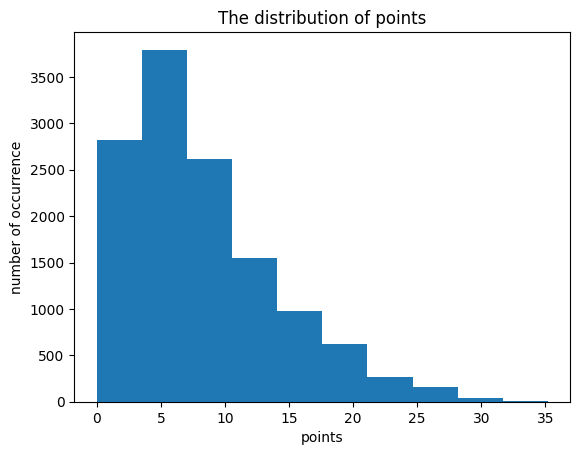

In [ ]:
plt.hist(df_learn.pts)
plt.title("The distribution of points")
plt.xlabel("points")
plt.ylabel("number of occurrence")
plt.show()

First we are going to try a KNN regressor model, both weighted and unweighted.

We are going to use the features from the orginal dataset, plus what year the player is currently in from the statline.


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse
from sklearn import neighbors

knn = neighbors.KNeighborsRegressor(n_neighbors=10)
X = df_learn[['career_year', 'net_rating', 'reb', 'ast', 'net_rating', 'oreb_pct', 'dreb_pct', 'usg_pct','ts_pct','ast_pct']]
Y = df_learn['pts']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)
knn.fit(X_train, y_train)
knn_w = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance')
knn_w.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=10, weights='distance')

In [ ]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(knn, X_test, y_test, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X_test, y_test, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: 0.63 (+/- 0.04)
Weighted Accuracy: 0.64 (+/- 0.04)


Based in the accuracy scores, both unweighted and weighted models are not very accurate in predicting the average points. Lets try a linear regression model.

In [ ]:
Y = df_learn['pts']
X = df_learn[['career_year', 'reb', 'ast', 'net_rating', 'oreb_pct', 'dreb_pct', 'usg_pct','ts_pct','ast_pct']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)
X_train = sm.add_constant(X_train)

print("The number of observations in training set is {}".format(X_train.shape[0]))
print("The number of observations in test set is {}".format(X_test.shape[0]))

The number of observations in training set is 10275
The number of observations in test set is 2569


In [ ]:
# Fit an OLS model using statsmodels
results = sm.OLS(y_train, X_train).fit()

# Print the summary results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    pts   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     9115.
Date:                Sat, 27 Jul 2024   Prob (F-statistic):               0.00
Time:                        18:47:48   Log-Likelihood:                -21305.
No. Observations:               10275   AIC:                         4.263e+04
Df Residuals:                   10265   BIC:                         4.270e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -4.5451      0.155    -29.386      

Looking at the R-Squared ,Adjusted R-Squared, and p-value the model is fairly accurate.  The p-values for each feature show they are useful to the model.  Lets do some cross validation with k-folds.

In [ ]:

from sklearn.model_selection import cross_val_score


lm = LinearRegression()
scores = cross_val_score(lm, X_test, y_test, scoring='r2', cv=10)
scores

print('Accuracy scores for the five folds: ', scores)
print('Mean cross-validation score: {:.3f}'.format(np.mean(scores)))

Accuracy scores for the five folds:  [0.89854434 0.89367582 0.74265951 0.86510137 0.87155418 0.85109534
 0.87894422 0.90185366 0.89688035 0.81955448]
Mean cross-validation score: 0.862


The cross validation with the test data shows good accruacy for the model.  I beleive the model has potential to be useful for predicting what a player could and should average, helping front offices look for potential acquisitions.


In [ ]:
#try using the statistice from previous year stat line to predict next year stat line